In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [61]:
df = pd.read_csv('../data/csv/Tipo di località e paese di residenza (IT1,122_54_DF_DCSC_TUR_10,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,OBS_VALUE
TIME_PERIOD,
2018,128.100932
2019,131.381653
2020,55.702138
2021,78.670967
2022,118.514633


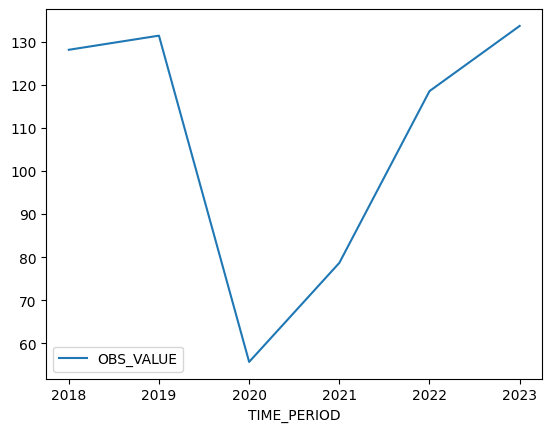

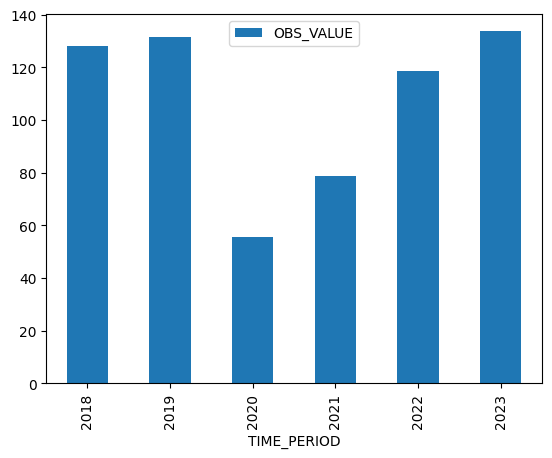

In [62]:

arrivals_per_year = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_year[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
arrivals.plot()
arrivals.plot.bar()
arrivals.head()

,OBS_VALUE
TIME_PERIOD,
2018,428.844937
2019,436.739271
2020,208.447085
2021,289.178142
2022,412.008532


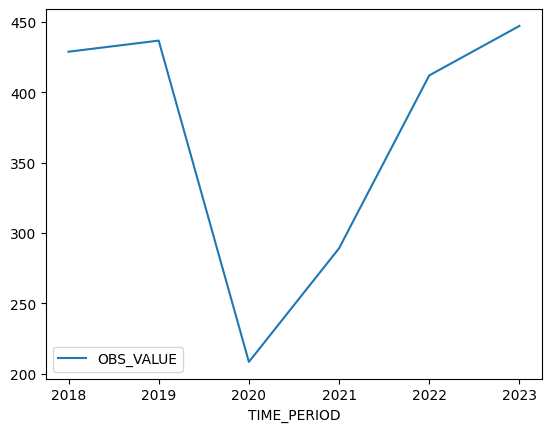

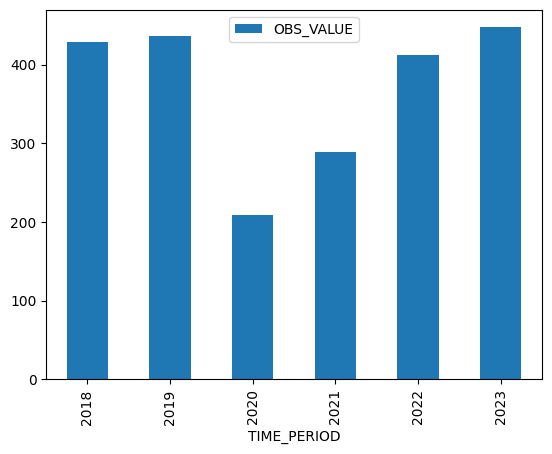

In [63]:
nights_spent_per_year = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'NI') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
nights_spent = nights_spent_per_year[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
nights_spent.plot()
nights_spent.plot.bar()
nights_spent.head()

## ARRIVALS AND NIGHTS SPENT PER YEAR

In [79]:
def get_pre(d):
  d[d.index <= 2019]
def get_curr(d):
  d[(d.index >= 2020) & (d.index <= 2021)]
def get_post(d):
  d[d.index >= 2022]

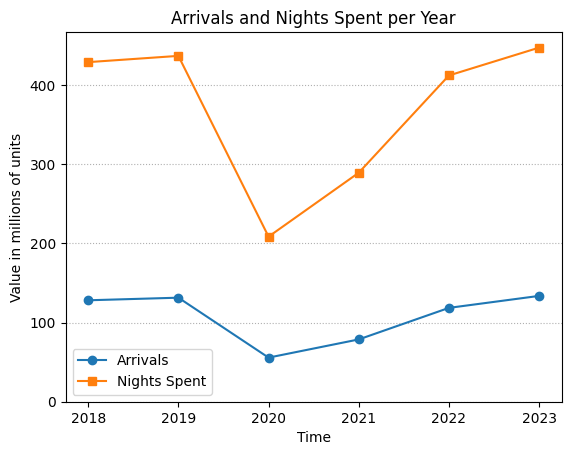

In [65]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-', label='Arrivals')
plt.plot(nights_spent.index, nights_spent['OBS_VALUE'], 's-', label='Nights Spent')

plt.ylabel("Value in millions of units")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

plt.show()

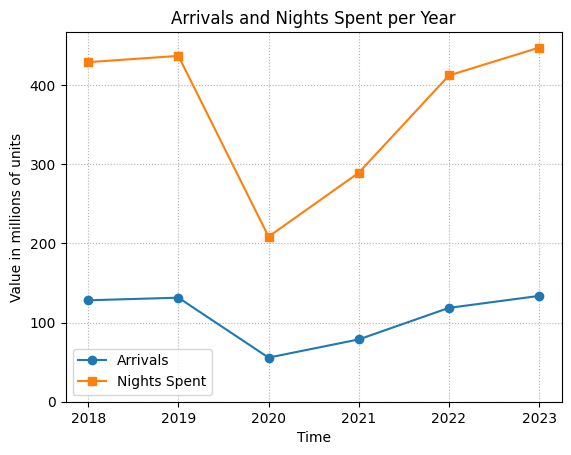

In [66]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-', label='Arrivals')
plt.plot(nights_spent.index, nights_spent['OBS_VALUE'], 's-', label='Nights Spent')

# Adding labels and title
plt.ylabel("Value in millions of units")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

plt.show()

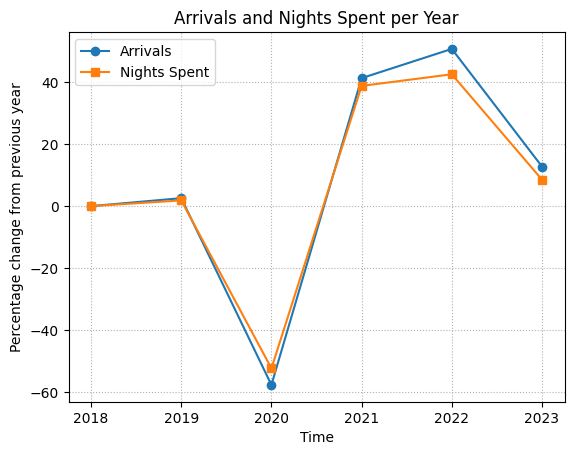

In [67]:
arrivals_change = arrivals['OBS_VALUE'].pct_change() * 100
arrivals_change = arrivals_change.fillna(0)

nights_spent_change = nights_spent['OBS_VALUE'].pct_change() * 100
nights_spent_change = nights_spent_change.fillna(0)

plt.plot(arrivals_change.index, arrivals_change.values, 'o-', label='Arrivals')
plt.plot(nights_spent_change.index, nights_spent_change.values, 's-', label='Nights Spent')

plt.ylabel("Percentage change from previous year")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, linestyle=':')

plt.show()


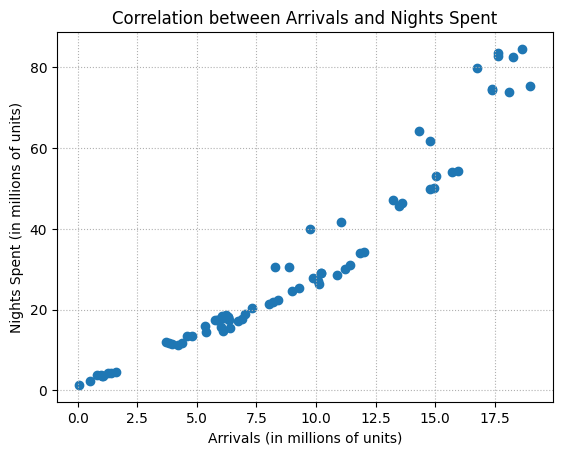

In [97]:
df_month = pd.read_csv('../data/csv/Tipo di località (IT1,122_54_DF_DCSC_TUR_6,1.0).csv')
df_month['OBS_VALUE'] = df_month['OBS_VALUE'] / 1000000
nights_spent_per_month = df_month[(df_month['COUNTRY_RES_GUESTS'] == 'WORLD') & (df_month['TYPE_ACCOMMODATION'] == 'ALL') & (df_month['DATA_TYPE'] == 'NI') & (df_month['TIME_PERIOD'].apply(str).apply(len) > 4) & (df_month['LOCALITY_TYPE'] == 'ALL')]
nights_spent_per_month = nights_spent_per_month[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
arrivals_per_month = df_month[(df_month['COUNTRY_RES_GUESTS'] == 'WORLD') & (df_month['TYPE_ACCOMMODATION'] == 'ALL') & (df_month['DATA_TYPE'] == 'AR') & (df_month['TIME_PERIOD'].apply(str).apply(len) > 4) & (df_month['LOCALITY_TYPE'] == 'ALL')]
arrivals_per_month = arrivals_per_month[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')

plt.scatter(arrivals_per_month['OBS_VALUE'], nights_spent_per_month['OBS_VALUE'])

plt.xlabel("Arrivals (in millions of units)")
plt.ylabel("Nights Spent (in millions of units)")
plt.title("Correlation between Arrivals and Nights Spent")
plt.grid(True, linestyle=':')

plt.show()

0.9596950004806546

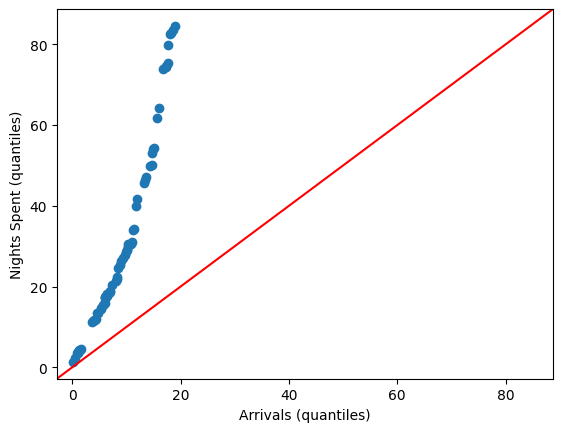

In [99]:
sm.qqplot_2samples(arrivals_per_month['OBS_VALUE'], nights_spent_per_month['OBS_VALUE'], xlabel='Arrivals (quantiles)', ylabel='Nights Spent (quantiles)', line='45')
arrivals_per_month['OBS_VALUE'].corr(nights_spent_per_month['OBS_VALUE'])

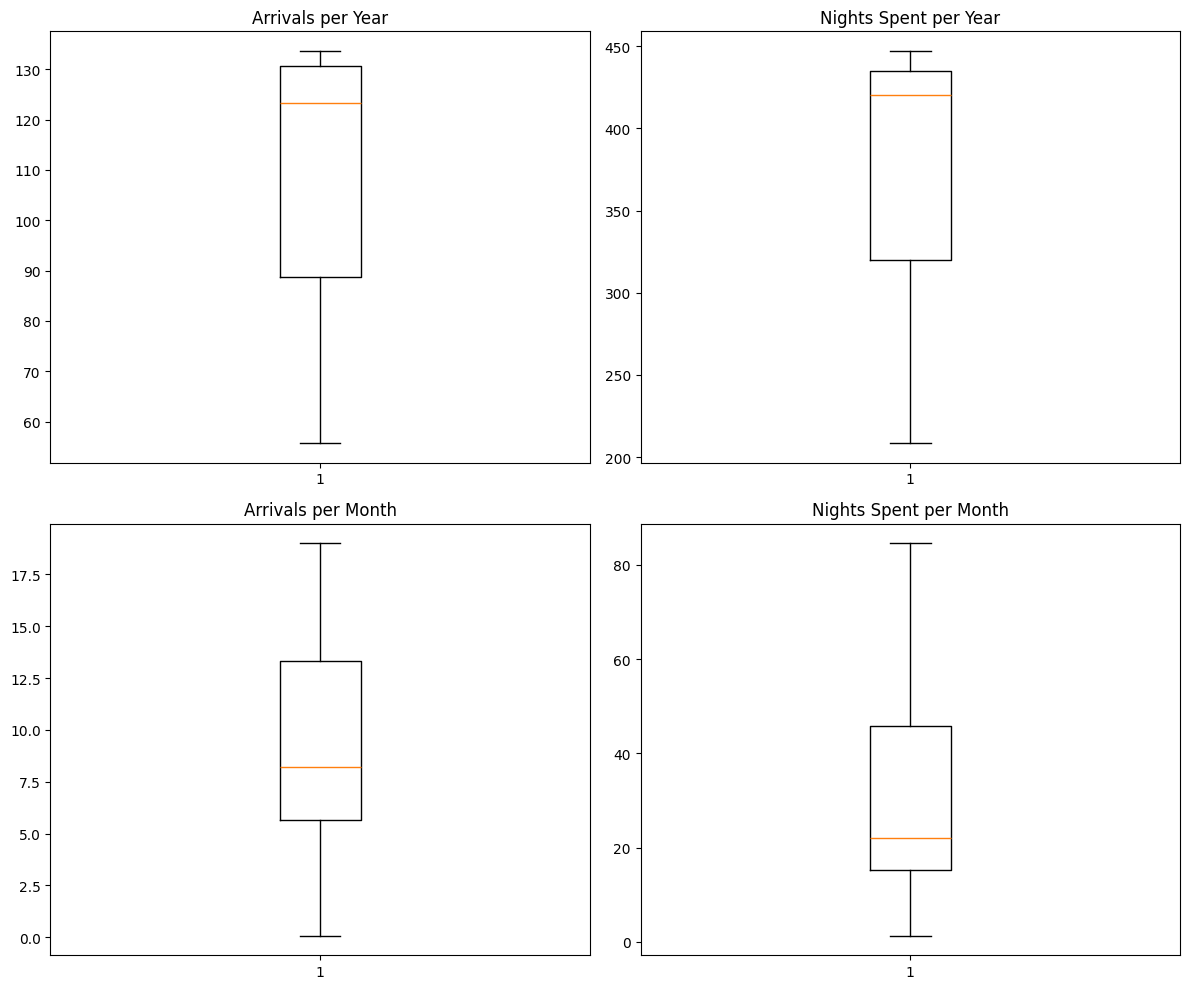

In [129]:
vert = True
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for arrivals
axs[0, 0].boxplot(arrivals['OBS_VALUE'], vert=vert)
axs[0, 0].set_title("Arrivals per Year")

# Boxplot for nights spent
axs[0, 1].boxplot(nights_spent['OBS_VALUE'], vert=vert)
axs[0, 1].set_title("Nights Spent per Year")

# Boxplot for arrivals per month
axs[1, 0].boxplot(arrivals_per_month['OBS_VALUE'], vert=vert)
axs[1, 0].set_title("Arrivals per Month")

# Boxplot for nights spent per month
axs[1, 1].boxplot(nights_spent_per_month['OBS_VALUE'], vert=vert)
axs[1, 1].set_title("Nights Spent per Month")

plt.tight_layout()
plt.show()

## ARRIVALS PER YEAR

In [86]:
pre = arrivals[arrivals.index <= 2019]
curr = arrivals[(arrivals.index >= 2020) & (arrivals.index <= 2021)]
post = arrivals[arrivals.index >= 2022]

(0.0, 137.53343755)

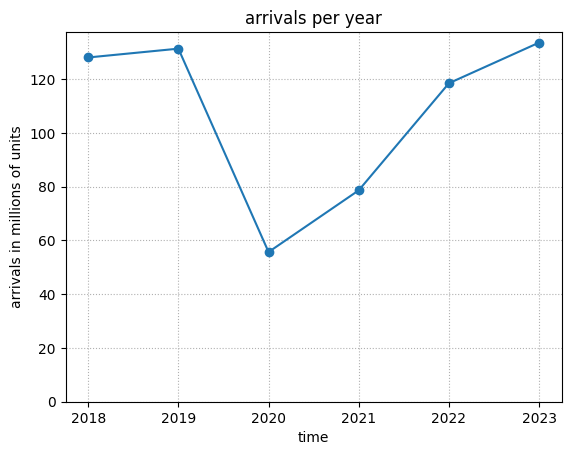

In [70]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

(0.0, 140.31854445)

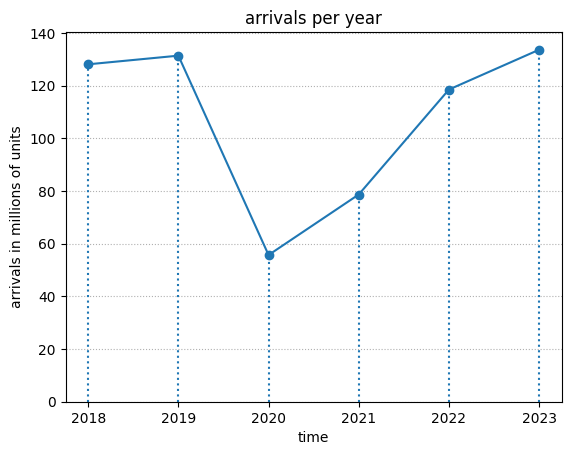

In [71]:
plt.vlines(arrivals.index, 0, arrivals['OBS_VALUE'], linestyles='dotted')
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

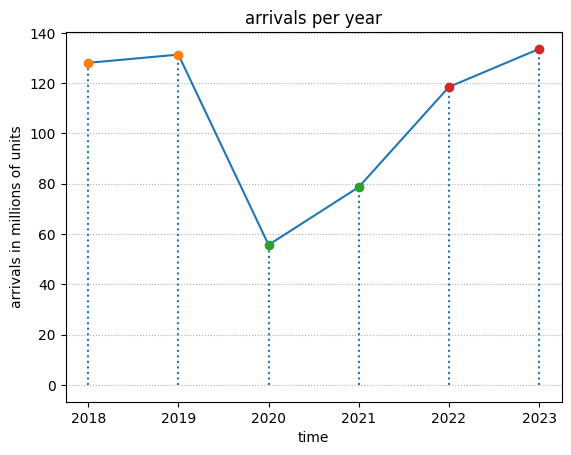

In [87]:
plt.vlines(arrivals.index, 0, arrivals['OBS_VALUE'], linestyles='dotted')
plt.plot(arrivals.index, arrivals['OBS_VALUE'])
plt.plot(pre.index, pre['OBS_VALUE'], 'o')
plt.plot(curr.index, curr['OBS_VALUE'], 'o')
plt.plot(post.index, post['OBS_VALUE'], 'o')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')

(0.0, 137.53343755)

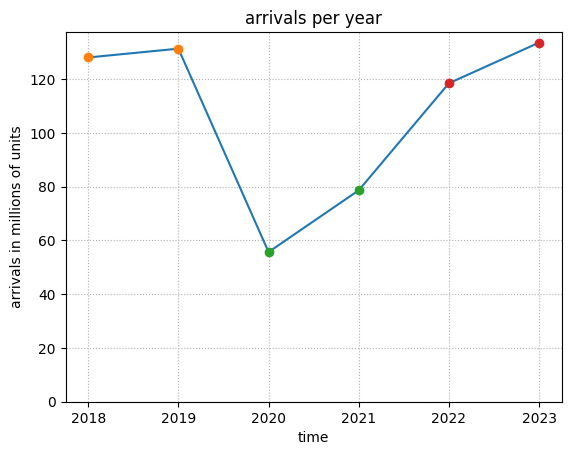

In [ ]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'])
plt.plot(pre.index, pre['OBS_VALUE'], 'o')
plt.plot(curr.index, curr['OBS_VALUE'], 'o')
plt.plot(post.index, post['OBS_VALUE'], 'o')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

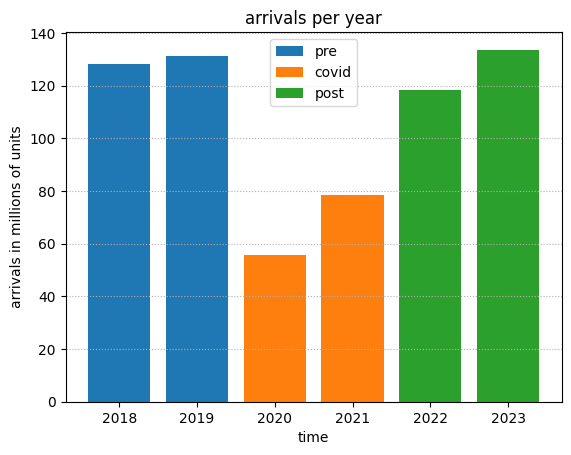

In [ ]:
plt.bar(pre.index, pre['OBS_VALUE'], label="pre")
plt.bar(curr.index, curr['OBS_VALUE'], label="covid")
plt.bar(post.index, post['OBS_VALUE'], label="post")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')

## ARRIVALS PER COUNTRY

In [ ]:
arrivals_per_country = df[(df['COUNTRY_RES_GUESTS'] != 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals_it = arrivals_per_country[arrivals_per_country['COUNTRY_RES_GUESTS'] == 'IT'].set_index('TIME_PERIOD')
arrivals_extra_it = arrivals_per_country[arrivals_per_country['COUNTRY_RES_GUESTS'] != 'IT'].set_index('TIME_PERIOD')

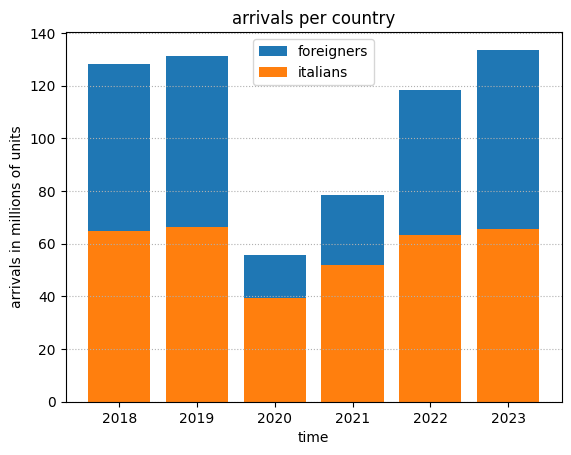

In [ ]:
plt.bar(arrivals_extra_it.index, arrivals_extra_it['OBS_VALUE'] + arrivals_it['OBS_VALUE'], label="foreigners")
plt.bar(arrivals_it.index, arrivals_it['OBS_VALUE'], label="italians")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per country")
plt.grid(True, axis='y', linestyle=':')

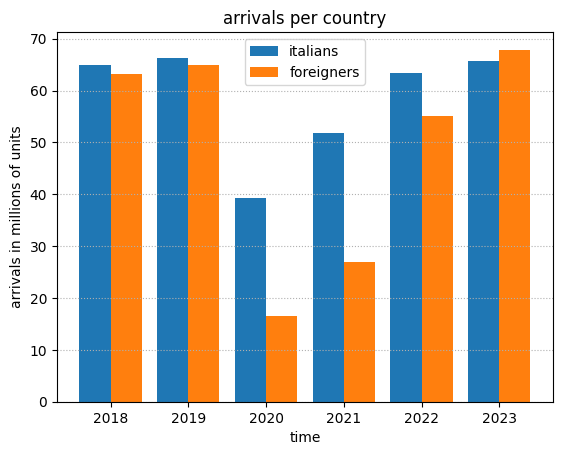

In [ ]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
bars1 = ax.bar(arrivals_it.index - width/2, arrivals_it['OBS_VALUE'], width, label='italians')
bars2 = ax.bar(arrivals_extra_it.index + width/2, arrivals_extra_it['OBS_VALUE'], width, label='foreigners')

# Adding labels and title
ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("time")
ax.legend()
ax.set_title("arrivals per country")
ax.grid(True, axis='y', linestyle=':')
plt.show()

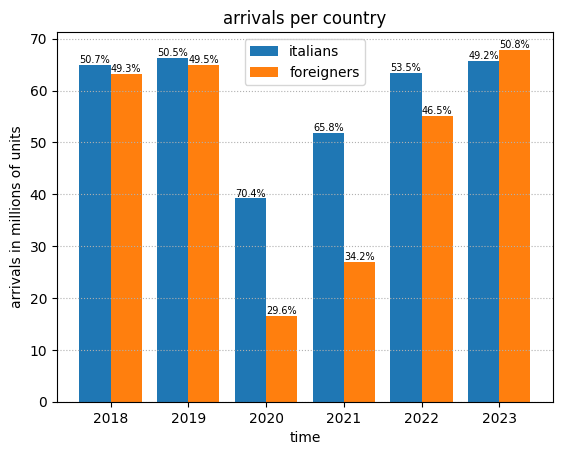

In [ ]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
bars1 = ax.bar(arrivals_it.index - width/2, arrivals_it['OBS_VALUE'], width, label='italians')
bars2 = ax.bar(arrivals_extra_it.index + width/2, arrivals_extra_it['OBS_VALUE'], width, label='foreigners')

# Adding labels and title
ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("time")
ax.legend()
ax.set_title("arrivals per country")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages on top of each bar
total_arrivals = arrivals_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0) + arrivals_extra_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0)
for bar in bars1:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() + width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() - width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

plt.show()

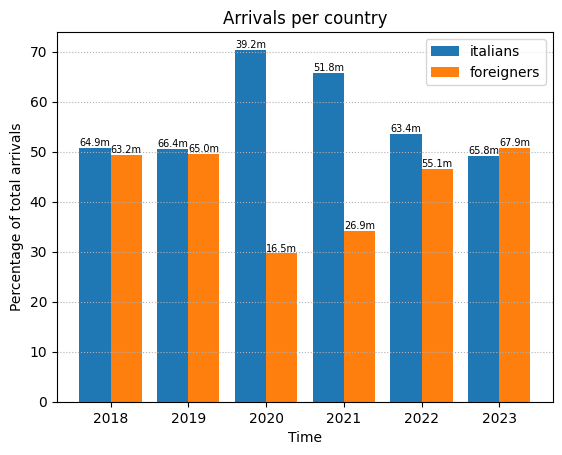

In [ ]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Calculate percentages
total_arrivals = arrivals_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0) + arrivals_extra_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0)
percentages_hotel = arrivals_it['OBS_VALUE'] / total_arrivals * 100
percentages_other = arrivals_extra_it['OBS_VALUE'] / total_arrivals * 100

# Plotting the bars
bars1 = ax.bar(arrivals_it.index - width/2, percentages_hotel, width, label='italians')
bars2 = ax.bar(arrivals_extra_it.index + width/2, percentages_other, width, label='foreigners')

# Adding labels and title
ax.set_ylabel("Percentage of total arrivals")
ax.set_xlabel("Time")
ax.legend()
ax.set_title("Arrivals per country")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages and absolute values on top of each bar
for bar in bars1:
  height = bar.get_height()
  absolute_value = arrivals_it.loc[round(bar.get_x() + width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  absolute_value = arrivals_extra_it.loc[round(bar.get_x() - width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

plt.show()

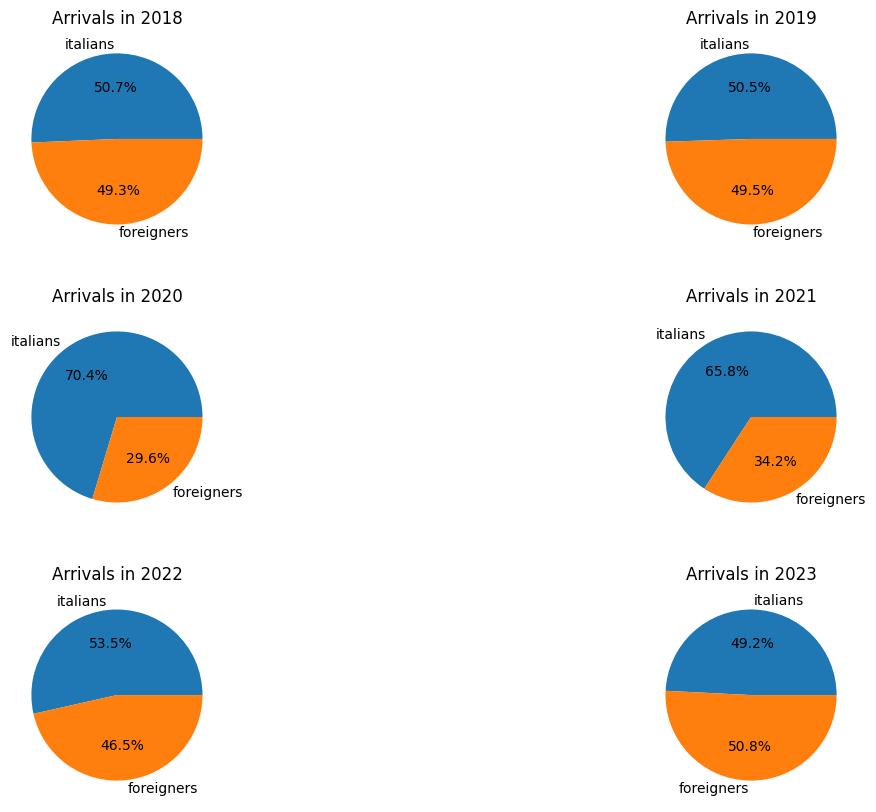

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  it_value = arrivals_it.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_it.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  ax.pie([it_value, other_value], labels=['italians', 'foreigners'], autopct='%1.1f%%')
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

## ARRIVALS PER ACCOMODATION

In [ ]:
arrivals_per_accommodation = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] != 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] == 'HOTELLIKE'].set_index('TIME_PERIOD')
arrivals_extra_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] != 'HOTELLIKE'].set_index('TIME_PERIOD')

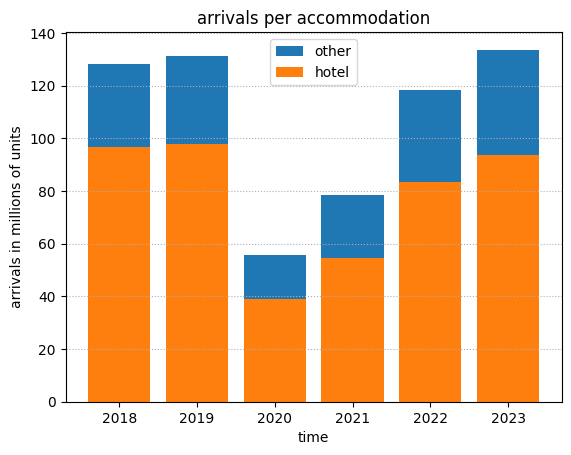

In [ ]:
plt.bar(arrivals_extra_hotel.index, arrivals_extra_hotel['OBS_VALUE'] + arrivals_hotel['OBS_VALUE'], label="other")
plt.bar(arrivals_hotel.index, arrivals_hotel['OBS_VALUE'], label="hotel")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per accommodation")
plt.grid(True, axis='y', linestyle=':')

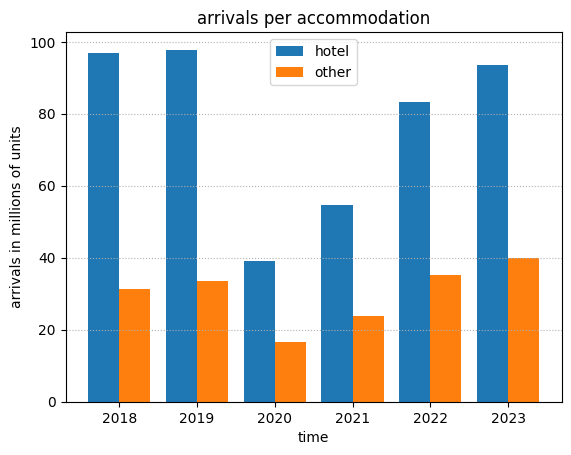

In [ ]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
bars1 = ax.bar(arrivals_hotel.index - width/2, arrivals_hotel['OBS_VALUE'], width, label='hotel')
bars2 = ax.bar(arrivals_extra_hotel.index + width/2, arrivals_extra_hotel['OBS_VALUE'], width, label='other')

# Adding labels and title
ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("time")
ax.legend()
ax.set_title("arrivals per accommodation")
ax.grid(True, axis='y', linestyle=':')

plt.show()

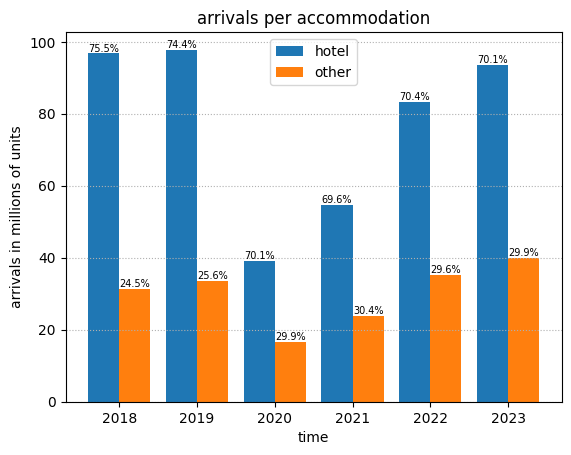

In [ ]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
bars1 = ax.bar(arrivals_hotel.index - width/2, arrivals_hotel['OBS_VALUE'], width, label='hotel')
bars2 = ax.bar(arrivals_extra_hotel.index + width/2, arrivals_extra_hotel['OBS_VALUE'], width, label='other')

# Adding labels and title
ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("time")
ax.legend()
ax.set_title("arrivals per accommodation")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages on top of each bar
total_arrivals = arrivals_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0) + arrivals_extra_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0)
for bar in bars1:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() + width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() - width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

plt.show()

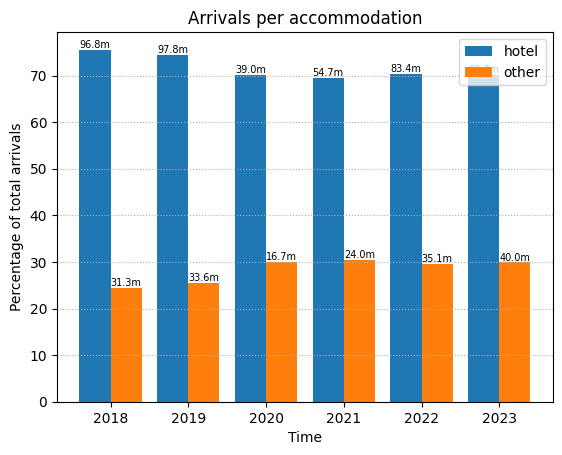

In [ ]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Calculate percentages
total_arrivals = arrivals_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0) + arrivals_extra_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0)
percentages_hotel = arrivals_hotel['OBS_VALUE'] / total_arrivals * 100
percentages_other = arrivals_extra_hotel['OBS_VALUE'] / total_arrivals * 100

# Plotting the bars
bars1 = ax.bar(arrivals_hotel.index - width/2, percentages_hotel, width, label='hotel')
bars2 = ax.bar(arrivals_extra_hotel.index + width/2, percentages_other, width, label='other')

# Adding labels and title
ax.set_ylabel("Percentage of total arrivals")
ax.set_xlabel("Time")
ax.legend()
ax.set_title("Arrivals per accommodation")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages and absolute values on top of each bar
for bar in bars1:
  height = bar.get_height()
  absolute_value = arrivals_hotel.loc[round(bar.get_x() + width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  absolute_value = arrivals_extra_hotel.loc[round(bar.get_x() - width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

plt.show()


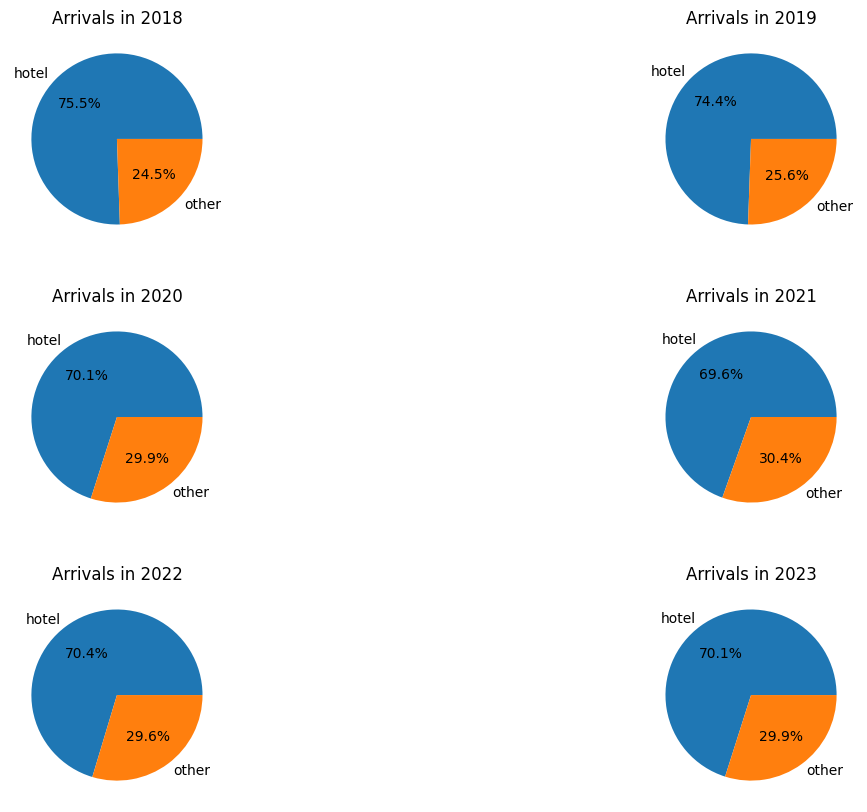

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  hotel_value = arrivals_hotel.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_hotel.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  ax.pie([hotel_value, other_value], labels=['hotel', 'other'], autopct='%1.1f%%')
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

## ARRIVALS PER MONTH

In [52]:
df = pd.read_csv('../data/csv/Tipo di località (IT1,122_54_DF_DCSC_TUR_6,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
arrivals_per_month = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) > 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_month[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
months = arrivals.index.to_series().apply(lambda x: x.split('-')[1]).unique()
years = arrivals.index.to_series().apply(lambda x: x.split('-')[0]).unique()

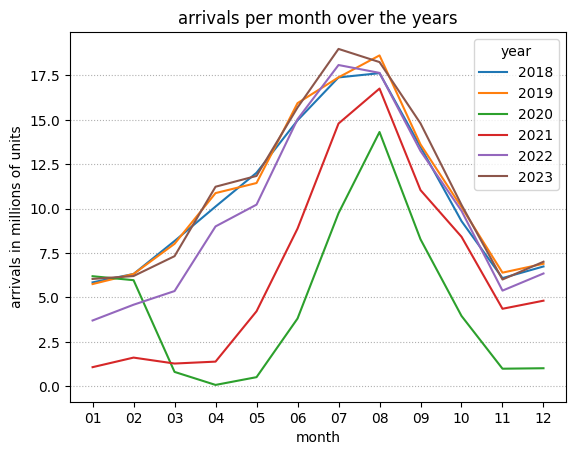

In [54]:
# fig, ax = plt.subplots(figsize=(12, 6))

for year in years:
  monthly_data = arrivals[arrivals.index.str.startswith(year)]
  plt.plot(monthly_data.index.str[-2:], monthly_data['OBS_VALUE'], label=year)

plt.ylabel("arrivals in millions of units")
plt.xlabel("month")
plt.title("arrivals per month over the years")
plt.legend(title="year")
plt.grid(True, axis='y', linestyle=':')

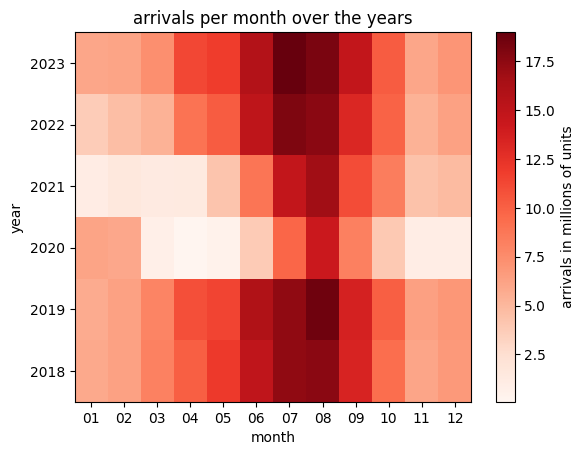

In [56]:
matrix = np.array([[arrivals.loc[f'{year}-{month}', 'OBS_VALUE'] if f'{year}-{month}' in arrivals.index else 0 for month in months] for year in years])
c = plt.pcolormesh(months, years, matrix, cmap='Reds')
plt.colorbar(c, label="arrivals in millions of units")
plt.xlabel("month")
plt.ylabel("year")
plt.title("arrivals per month over the years")
plt.show()

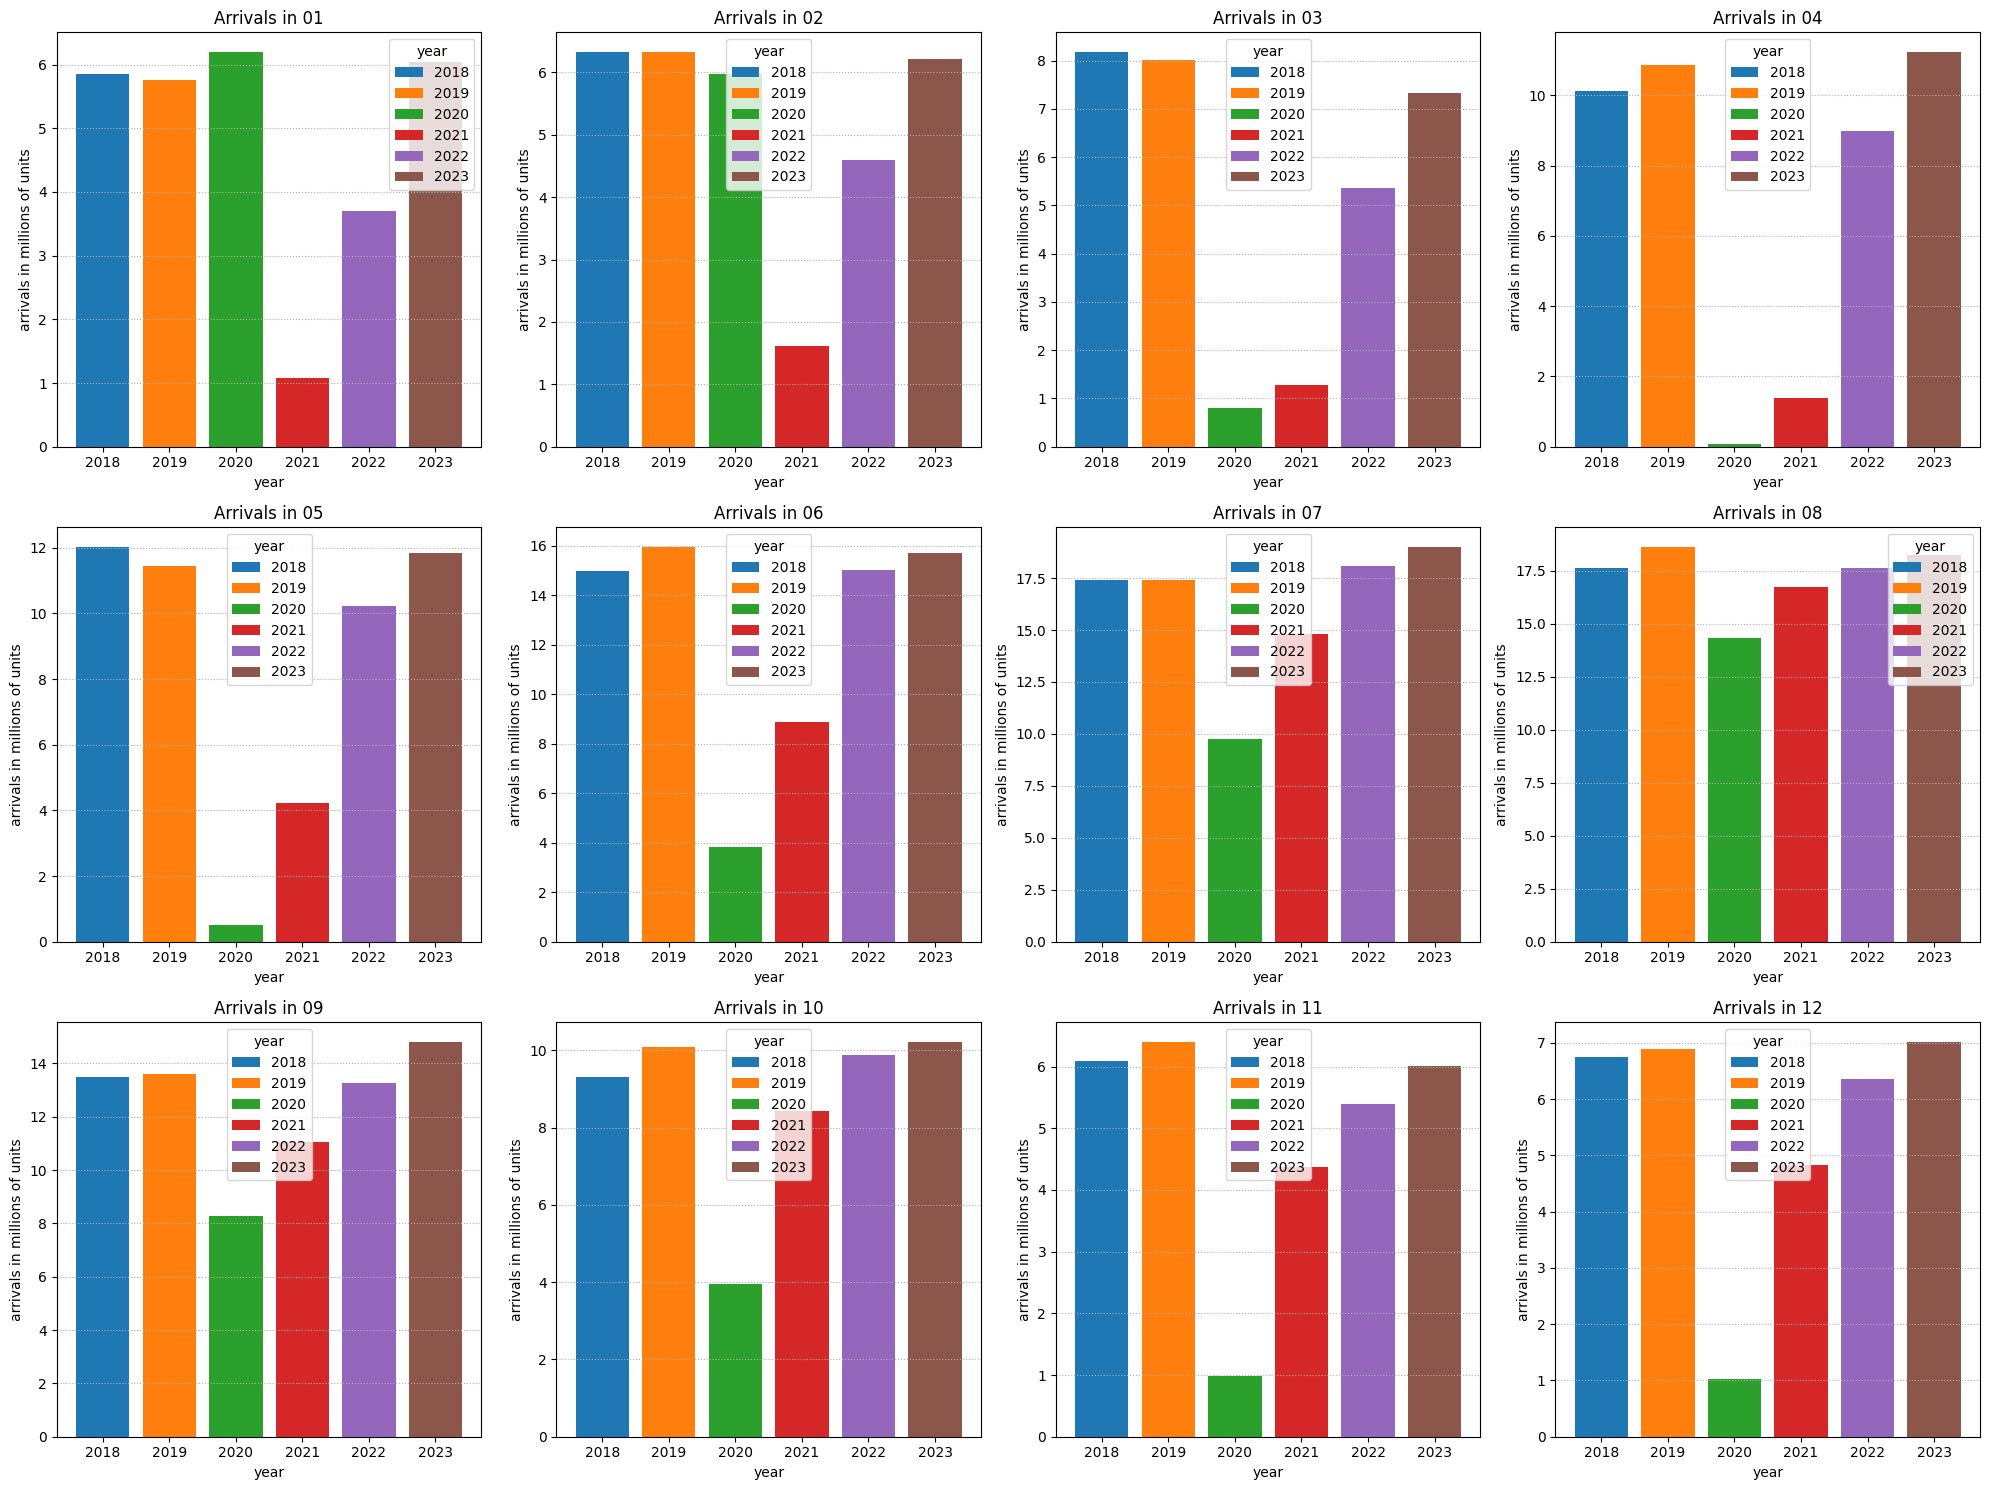

In [151]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for i, month in enumerate(months):
  ax = axs[i // 4, i % 4]
  for year in years:
    monthly_data = arrivals[(arrivals.index.str.endswith(month)) & (arrivals.index.str.startswith(year))]
    ax.bar(year, monthly_data['OBS_VALUE'], label=year)
  ax.set_title(f'Arrivals in {month}')
  ax.set_ylabel("arrivals in millions of units")
  ax.set_xlabel("year")
  ax.legend(title="year")
  ax.grid(True, axis='y', linestyle=':')

plt.tight_layout()
plt.show()


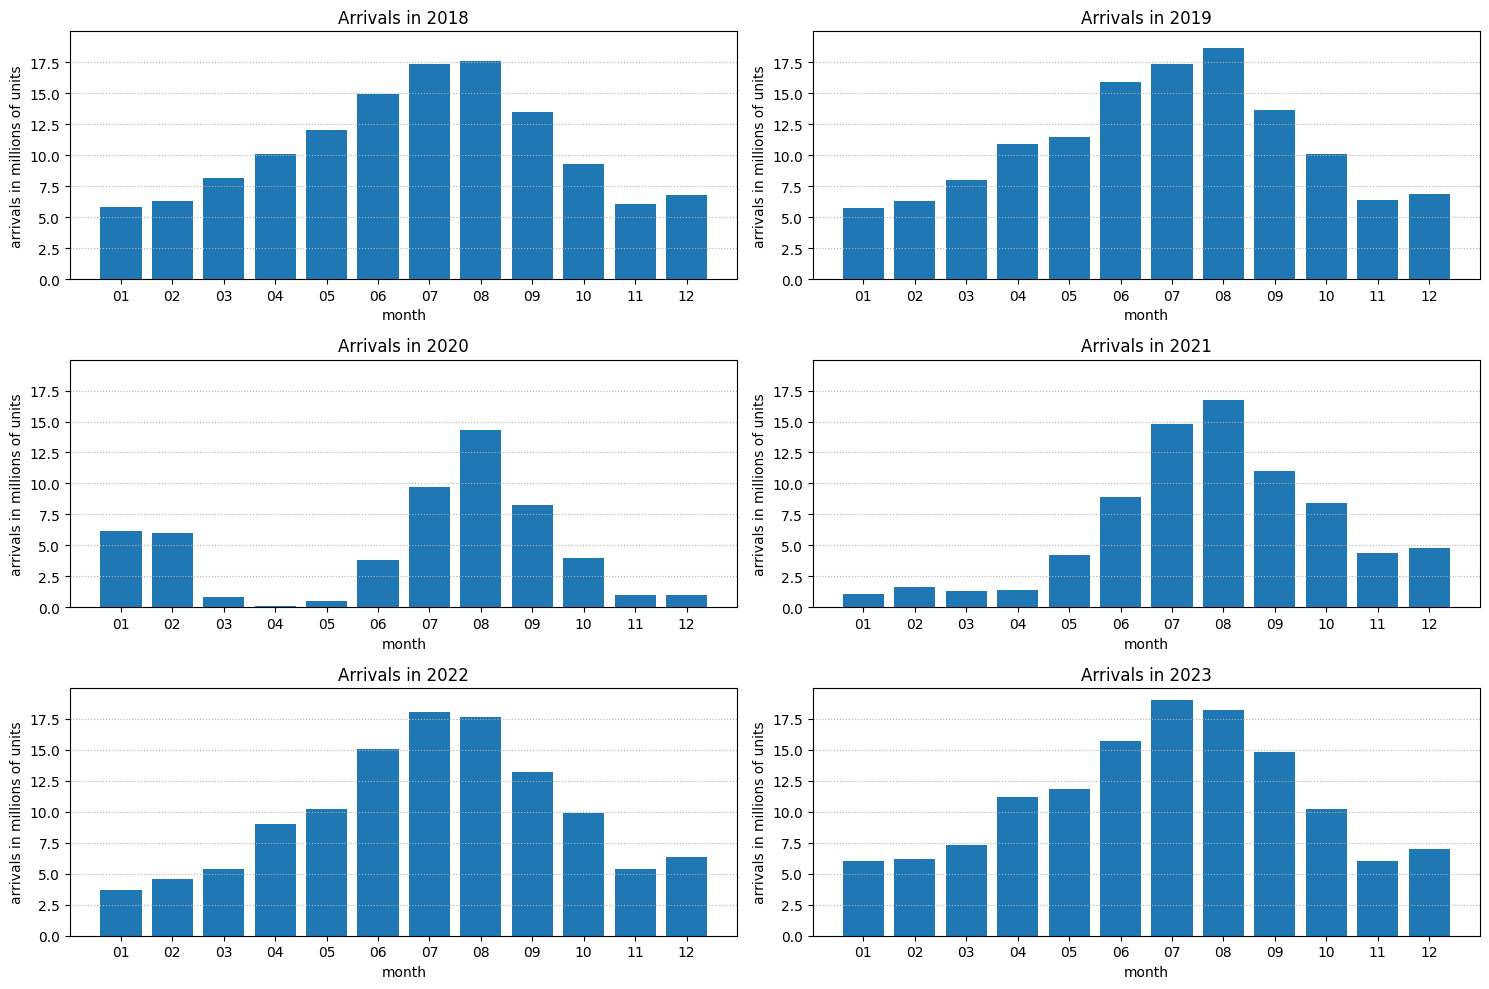

In [159]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Determine the maximum y-value for setting a common scale
max_y_value = arrivals['OBS_VALUE'].max()

for i, year in enumerate(years):
  ax = axs[i // 2, i % 2]
  monthly_data = arrivals[arrivals.index.str.startswith(year)]
  ax.bar(monthly_data.index.str[-2:], monthly_data['OBS_VALUE'])
  ax.set_title(f'Arrivals in {year}')
  ax.set_ylabel("arrivals in millions of units")
  ax.set_xlabel("month")
  ax.set_ylim(0, max_y_value+1)  # Set the same y-axis limit for all subplots
  ax.grid(True, axis='y', linestyle=':')

plt.tight_layout()
plt.show()

## ARRIVALS PER REGION - DATA IS WRONG

In [19]:
df = pd.read_csv('../data/csv/Residenti per regione di origine (IT1,122_54_DF_DCSC_TUR_8,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_8(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_8(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_8(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_8(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_8(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
arrivals_per_region = df[(df['COUNTRY_RES_GUESTS'] != 'IT') & (df['DATA_TYPE'] == 'AR')]
arrivals = arrivals_per_region[['COUNTRY_RES_GUESTS', 'OBS_VALUE', 'TIME_PERIOD']]
regions = arrivals['COUNTRY_RES_GUESTS'].unique()
years = arrivals['TIME_PERIOD'].unique()

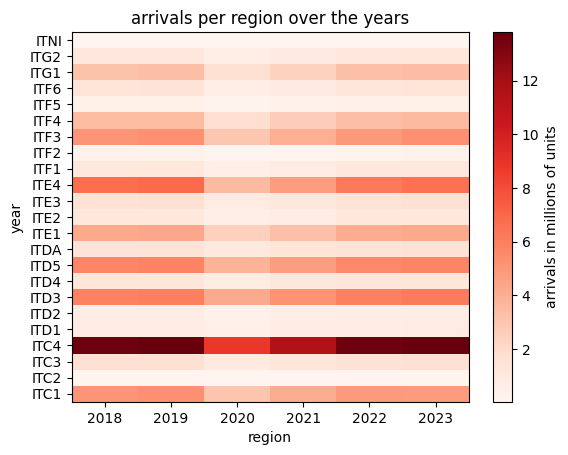

In [50]:
fig, ax = plt.subplots()

# Create a matrix with zeros
matrix = np.zeros((len(regions), len(years)))

# Fill the matrix with the OBS_VALUE data
for i, region in enumerate(regions):
  for j, year in enumerate(years):
    value = arrivals[(arrivals['COUNTRY_RES_GUESTS'] == region) & (arrivals['TIME_PERIOD'] == year)]['OBS_VALUE']
    if not value.empty:
      matrix[i, j] = value.values[0]

c = ax.pcolormesh(years, regions, matrix, cmap='Reds')
fig.colorbar(c, ax=ax, label="arrivals in millions of units")
plt.xlabel("region")
plt.ylabel("year")
plt.title("arrivals per region over the years")
plt.show()